## Modelado de datos con Redes Neuronales (Class 7)
### **Gradient descent

Last class: 
* least squares method
* loss function MSE
* MAE, MAPE, RMSE

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - f(x_i)]^2 
$$

$f(x_i)$ is called hypothesis function ($\theta(x)$)

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$
where:

$$S_i=y_i - (a_1 x_i + a_0)$$
are residuals

$$
E = \sum_{i=1}^{m}[S_i]^2 
$$

* the objective is to make the sum of the squares of the residuals to make as small as possible

* why is it called ***least squares method***?
https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html

MSE - loss function
$$
E = \frac{1}{m} \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

Most commonly written using $J$ ad $\theta$
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[y_i - (\theta_1 x_i + \theta_0)]^2 
$$

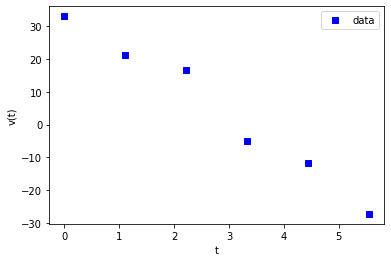

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,1.11, 2.22,3.33, 4.44, 5.55])
v=np.array([ 33.10, 21.33, 16.57,-5.04, -11.74, -27.32])
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

a1=  -10.885971696284402
a0=  34.69190479052255
[0.82703577 2.77941242]


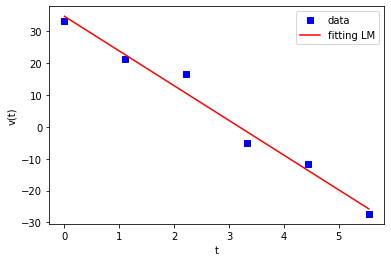

In [2]:
def func(x, a1, a0):
    return a1 * x + a0

#Time
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])
#Velocities measured for every time t[i]
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])
xdata=t
ydata=v

p0=np.array([10.0,10.0])
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata, p0, method='lm')
perr = np.sqrt(np.diag(pcov))
print('a1= ',popt[0])
print('a0= ',popt[1])
print(perr)

t_mesh=np.linspace(np.min(t),np.max(t),100)
v_fit=popt[0]*t_mesh + popt[1]

fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.plot(t_mesh,v_fit,'-r', label='fitting LM')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

### Finding the coefficients analytically:

To analytically minimize the function of 2 variables 

$$
E = \frac{1}{m} \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

it is necessary to set its partial derivatives to zero and simultaneously solve to the resulting equations. But the best procedure for determining best linear approximations is to minimize the sum of the square of the diffences between the y values on the approximating line and the given y values.

This is, minimize the next expression with respect to $a_0$ and $a_1$
i.e., a minimum to occur. Then, it is needed to take the partial derivatives with respect to $a_0$  and $a_1$ and equating them to zero.


$$
\frac{\partial E}{\partial a_0} = 0 \hspace{1cm} 
\frac{\partial E}{\partial a_1} = 0 
$$

* its like a system of equations requied to find two unknowns - here $a_0$ and $a_1$

Afterwards, 

$$
0= 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-1) \hspace{1.5cm} 
0 = 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-x_i) \\
a_0 m + a_1\sum_{i=1}^{m}x_i = \sum_{i=1}^{m} y_i \hspace{1.5cm} a_0\sum_{i=1}^{m}x_i  + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
$$

where the coefficients $a_0$ and $a_1$ can be easily obtained

$$
a_0 = \frac{\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m}y_i - \sum_{i=1}^{m} x_iy_i \sum_{i=1}^{m} x_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} \hspace{1.5cm}
a_1 = \frac{m\sum_{i=1}^{m} x_iy_i^2 - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} 
$$

Now, using the error definition one can find the error associated to the approximation made,

since the coefficients $a_0$ and $a_1$ are already known. 

In [3]:
# Finding adjusting parameters 
def Linear_least_square( x,y ):
    
    #Finding coefficients 
    length = len(x)
    square_x = np.sum([x[i]**2 for i in range(length)])
    sum_xy = np.sum([x[i]*y[i] for i in range(length)])
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    a0 = ( square_x*sum_y - sum_xy*sum_x ) / ( length*square_x  - sum_x**2 )
    a1 = ( length*sum_xy - sum_x*sum_y ) / ( length*square_x  - sum_x**2 )
    
    #Returning a_0 and a_1 coefficients
    return np.array([a0,a1])

#Line function adjusting the data set
def Line(a0,a1,x):
    return a0+a1*x

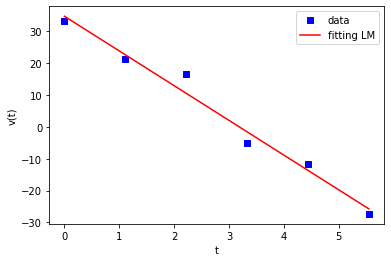

In [4]:
a0, a1 = Linear_least_square( t,v )

fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.plot(t,Line(a0,a1,t),'-r', label='fitting LM')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

### Least Squares Method
* The analytical way (above) is called ***Ordinary Least Square method***
* But there are also numerical versions of ***Least Square Method*** (quite complex) for example Levenberg-Marquardt (LM) actually used by default in the numerical example that was shown earlier

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

### Problems with Least Squares Methods and the solution
* the analytical one is very difficult to solve if the funcion target function is more complicated (4-space and higher 4 dimensions, or for complex systems) it may be incredibly difficult to solve an equation for zero!. 
* LM is very expensive in terms of memory

* #### gradient descent is a very good and method commonly used in machine learning algorithms

## Comparison of most commond optimizaton algorithms
* GD  - Gradient descent.
* NM  - Newton method.
* CG  - Conjugate gradient.
* QNM - Quasi-Newton method.
* LM  - Levenberg-Marquardt algorithm.

<table><tr>
<td> <img src="imgs/performance-comparison.svg" width="500" /> </td>
</tr></table>

* For large neural networks that has many parameters, it is recommended to use gradient descent or conjugate gradient, to save memory.

* For small neural networks that has very few parameters, alternative is LM algorithm

* Training a model is just minimising the loss function, and to minimise you want to move in the negative direction of the derivative. 

# Gradient descent method

To understand the gradient descent, as an optimization method, you need to recall some math

The derivative of a function is positive when the function increases and is negative when the function decreases.


$$\frac{d}{dw}f(w)>0→f(w)↗$$
$$\frac{d}{dw}f(w)<0→f(w)↗$$

This is happening because the derivative can be seen as the slope of a function’s plot at a given point.

The gradient descent (similarly to other methods mentioned above) wants to minimize the cost function aka error function (MSE)

$$
MSE = \frac{1}{m} \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

in Machine Learning they use $J(\theta)$ and will be called hypothesis function $$h_{\theta}(x_i)=\theta_1 x_i + \theta_0$$

$$
MSE = \frac{1}{m} \sum_{i=1}^{m}[y_i - (\theta_1 x_i + \theta_0)]^2 
$$

$$
J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^{m}[y_i - h_{\theta}(x_i)]^2 
$$

$$
J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]^2 
$$

*Im just shifting from the computational Physics to machine learning nomenclature

Notice that the $J(\theta)$ (MSE) is always positive (since it’s a sum of squared values) and therefore has a known minimum, which is 0 - so it can be minimized using the this method.

<table><tr>
<td> <img src="imgs/mse-slope-plot.png" width="300" /> </td>
</tr></table>

the sign of the slope provides useful information of where the minimum of the function is!!!. We can use the value of the slope (the derivative) to adjust the value of the coefficient w  
(i.e.: $\theta = \theta - slope$).

### The role of the derivative

Gradient descent is an iterative algorithm which we will run many times. On each iteration, we apply the following “update rule” (the := symbol means replace theta with the value computed on the right)

We want gradient descent to find $\theta$s that minimizes the cost function.

Let’s take the much simpler function $J(\theta)=\theta^2$
, and let’s say we want to find the value of $\theta$ which minimizes $J(\theta)$

Gradient descent starts with a random value of $\theta$,  let’s start with $\theta=3$


$\alpha$ is a parameter called the learning rate which we’ll come back to, but for now we’re going to set it to 0.1. The derivative of $J(\theta)$ is simply $2\theta$.

$$\theta:=\theta - \alpha \frac{d}{d\theta}J(\theta)$$
$$\theta:=3 - 0.1 *  (2*3)$$
$$\theta=2.4$$

<table><tr>
<td> <img src="imgs/gradientdescenttable.png" width="200" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/simple2dgradientdescent.png" width="500" /> </td>
</tr></table>


## Gradient descent on MSE cost function.

Taking the derivative of this equation is a little more tricky. The key thing to remember is that $x$ and $y$ are not variables for the sake of the derivative. Rather, they represent a large set of constants (your training set). So when taking the derivative of the cost function, we’ll treat $x$ and $y$ like we would any other constant.

Once again, our hypothesis function for linear regression is the following:
$$h_{\theta}(x)=\theta_1 x + \theta_0$$

In the previous example we had just one parameter (just to make things simple), but in the MSE we have two parameters:


# One more small modification of the MSE

In machine learning they use so called "One Half Mean Squared Error" but it doesnt change much, look:  
from this
$$
J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]^2 
$$

to this  

$$
J(\theta_0,\theta_1) = \frac{1}{2m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]^2 
$$

Why? Because taking the derivative of the function $[]^2$ will simplify with $\frac{1}{2m}$ giving $\frac{1}{m}$

<table><tr>
<td> <img src="imgs/GradientDescentOfMSETable.png" width="400" /> </td>
</tr></table>

* Check by yourself at home that the derivatives with respect to $\theta_1$ and $\theta_0$ of this cost function $J(\theta_0,\theta_1)$ give those results!
* but the important part is this:

$$\theta_0:=\theta_0 - \alpha \frac{d}{d\theta_0}J(\theta_0,\theta_1)$$
$$\theta_1:=\theta_1 - \alpha \frac{d}{d\theta_1}J(\theta_0,\theta_1)$$

finally:

$$\theta_0:=\theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}[ h_{\theta}(x_i) - y_i]$$
$$\theta_1:=\theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}([ h_{\theta}(x_i) - y_i]*x_i)$$

## *it is important to know that $\theta_0$ and $\theta_1$ must be updated simultaneously!!!


### Numerical implementation of the above code:
* initialize thetas

* calculate the hypothesis: hx=theta_1*x + theta_0

* d_theta_0 = $-\frac{1}{m} \sum_{i=1}^{m}[ y_i - hx]$
* d_theta_1 = $-\frac{1}{m} \sum_{i=1}^{m}([ y_i - hx]*x_i)$

- remember that the x and y are vectors of data
- the above in python is simple the sum is done by: sum(y-hx) as they are vectors

then  
* theta_0 = theta_0 - $\alpha$*d_theta_0
* theta_1 = theta_1 - $\alpha$*d_theta_1

* and update the hypothesis with the new values
* iterative process, lets say 100 times

# Homework
Realize numerically gradient descent method on the "data.csv"
which represent some linear regression problem (fitting)  

Use following parameters:

    theta_1 = 10     # initial values of   
    theta_0 = 10     # y=theta_1*x + theta_0  
    alpha = 0.0001   # The learning Rate  
    epochs = 100     # The number of iterations  
    
After finding the optimal $\theta_0$ and $\theta_1$ that minimized the MSE function make four plots (on an array... using plt.subplots(2,2))

* plot 1 the final fitting line to the data and compare it with the scipy.optimize (lm) build-in function
* plot 2 time evolution of MSE vs number of iterations
* plot 3 time evolution of MAE vs number of iterations
* plot 4 time evolution of MAPE vs number of iterations



to store results of for example MAPE, you can   
create empty list: MAPE=[]  
then inside a loop: MAPE.append(calculated mape)

* play with $\alpha$ to see how the learning rate affects the optimization 
* intenta alpha=0.0007

# Simpler implementation of the LSM analytical solution 

1.2873573700109395 9.90860619032614


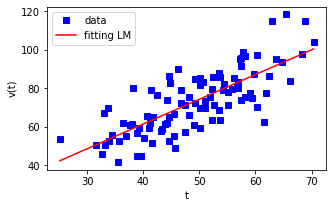

In [9]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

theta1=(np.mean(X*Y) - np.mean(X)*np.mean(Y) )/ (np.mean(X**2) - np.mean(X)**2)
theta0= np.mean(Y) - theta_1*np.mean(X)

print(theta1,theta0)


X_fit=np.linspace(np.min(X),np.max(X),100)
Y_fit=theta_1*X_fit + theta_0

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(X,Y,'sb', label='data')
ax.plot(X_fit,Y_fit,'-r', label='fitting LM')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()
plt.pause(10)